In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**University of Edinburgh**

**School of Mathematics**

**Bayesian Data Analysis, 2020/2021, Semester 2**

**Daniel Paulin & Nicolò Margaritella**

**R scripts for Lecture 3**

In [2]:
#This code unzips an installation of R-INLA from an online source, and loads INLA
#IMPORTANT: Go to the Kaggle Settings (right hand side) and enable the Internet option before running this.
system("wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=1XKmf19XyEw9Swrezkiyb0N1KsP2Tsyvh' -O /kaggle/working/kaggle_INLA.zip")
system("unzip /kaggle/working/kaggle_INLA.zip")
system("rm /kaggle/working/kaggle_INLA.zip")
library(INLA,lib.loc="/kaggle/working")
#If INLA has been successfully loaded, you should see the following:
#This is INLA_20.03.17 built 2021-01-02 20:27:47 UTC.
#See www.r-inla.org/contact-us for how to get help.
#To enable PARDISO sparse library; see inla.pardiso()

#The following code does the full installation. You can try it if the previous code fails, but this takes longer.
#install.packages("INLA",repos=c(getOption("repos"),INLA="https://inla.r-inla-download.org/R/stable"), dep=TRUE,lib="/kaggle/working")
#library(INLA,lib.loc="/kaggle/working")

Loading required package: Matrix

Loading required package: sp

Loading required package: parallel

Loading required package: foreach

This is INLA_20.03.17 built 2021-01-02 20:27:47 UTC.
See www.r-inla.org/contact-us for how to get help.
To enable PARDISO sparse library; see inla.pardiso()



# 1. Mtcars example

In [3]:
#We load the dataset, select the relevant covariates,
# and fit a linear regression model

data(mtcars)
mtcars1=mtcars[c("mpg","drat","wt","qsec")]
m.mtcars.linear=lm(mpg~drat+wt+qsec,data=mtcars1)
summary(m.mtcars.linear)


Call:
lm(formula = mpg ~ drat + wt + qsec, data = mtcars1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1152 -1.8273 -0.2696  1.0502  5.5010 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.3945     8.0689   1.412  0.16892    
drat          1.6561     1.2269   1.350  0.18789    
wt           -4.3978     0.6781  -6.485 5.01e-07 ***
qsec          0.9462     0.2616   3.616  0.00116 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.56 on 28 degrees of freedom
Multiple R-squared:  0.837,	Adjusted R-squared:  0.8196 
F-statistic: 47.93 on 3 and 28 DF,  p-value: 3.723e-11


In [4]:
#This code fits the same model with INLA, using the default priors

m.mtcars.I.defaultprior=inla(mpg~drat+wt+qsec,data=mtcars1,family="gaussian")
summary(m.mtcars.I.defaultprior)

#By default, the intercept of the model is assigned a Gaussian prior with mean
#and precision equal to 0.
#The rest of the fixed effects (regression coefficients) are assigned Gaussian
#priors with mean equal to 0 and precision equal to 0.001.

#The default prior for the Gaussian precision tau of the Gaussian likelihood is
# a Gamma prior with parameters (1, 0.00005).
#As internally the logarithm of the precision theta=log(tau) is stored,
#this is equivalent to a log-Gamma prior on theta with parameters (1, 0.00005).


Call:
   "inla(formula = mpg ~ drat + wt + qsec, family = \"gaussian\", data = 
   mtcars1)" 
Time used:
    Pre = 0.502, Running = 0.123, Post = 0.0393, Total = 0.664 
Fixed effects:
              mean    sd 0.025quant 0.5quant 0.975quant   mode kld
(Intercept) 11.390 8.037     -4.497   11.390     27.265 11.391   0
drat         1.656 1.222     -0.759    1.656      4.069  1.656   0
wt          -4.397 0.675     -5.732   -4.397     -3.063 -4.397   0
qsec         0.946 0.261      0.431    0.946      1.461  0.946   0

Model hyperparameters:
                                         mean    sd 0.025quant 0.5quant
Precision for the Gaussian observations 0.163 0.042      0.092     0.16
                                        0.975quant  mode
Precision for the Gaussian observations      0.256 0.153

Expected number of effective parameters(stdev): 4.00(0.001)
Number of equivalent replicates : 8.00 

Marginal log-Likelihood:  -97.81 

In [5]:
prec.prior <- list(prec=list(prior = "loggamma", param = c(0.1, 0.1)))
prior.beta <- list(mean.intercept = 0, prec.intercept = 0.001,
                    mean = 0, prec = 0.001)
#If you would want to choose a different mean or precision for the Gaussian prior of the 
#3 regression coefficients, you could achieve this by passing along lists to mean and prec,
#prior.beta <- list(mean.intercept = 0, prec.intercept = 0.001,
#                   mean = list(drat=0.1,wt=-0.1,qsec=0.5),
#                   prec = list(drat=0.001,wt=0.002,qsec=0.003))

m.mtcars.I=inla(mpg~drat+wt+qsec,data=mtcars1,family="gaussian",control.family=list(hyper=prec.prior),control.fixed=prior.beta)
summary(m.mtcars.I)


Call:
   c("inla(formula = mpg ~ drat + wt + qsec, family = \"gaussian\", data = 
   mtcars1, ", " control.family = list(hyper = prec.prior), control.fixed 
   = prior.beta)" ) 
Time used:
    Pre = 0.341, Running = 0.0696, Post = 0.0274, Total = 0.438 
Fixed effects:
              mean    sd 0.025quant 0.5quant 0.975quant   mode kld
(Intercept) 10.659 8.013     -5.238   10.681     26.419 10.724   0
drat         1.741 1.236     -0.694    1.739      4.190  1.734   0
wt          -4.351 0.684     -5.698   -4.352     -2.996 -4.355   0
qsec         0.962 0.265      0.438    0.961      1.487  0.960   0

Model hyperparameters:
                                         mean    sd 0.025quant 0.5quant
Precision for the Gaussian observations 0.154 0.041      0.084     0.15
                                        0.975quant  mode
Precision for the Gaussian observations      0.244 0.143

Expected number of effective parameters(stdev): 3.93(0.018)
Number of equivalent replicates : 8.14 

Marginal lo

In [6]:
names(m.mtcars.I)
#This command lists all of the available names in the inla object that we are able to use to extract information

[1] "names.fixed"                 "summary.fixed"              
 [3] "marginals.fixed"             "summary.lincomb"            
 [5] "marginals.lincomb"           "size.lincomb"               
 [7] "summary.lincomb.derived"     "marginals.lincomb.derived"  
 [9] "size.lincomb.derived"        "mlik"                       
[11] "cpo"                         "po"                         
[13] "waic"                        "model.random"               
[15] "summary.random"              "marginals.random"           
[17] "size.random"                 "summary.linear.predictor"   
[19] "marginals.linear.predictor"  "summary.fitted.values"      
[21] "marginals.fitted.values"     "size.linear.predictor"      
[23] "summary.hyperpar"            "marginals.hyperpar"         
[25] "internal.summary.hyperpar"   "internal.marginals.hyperpar"
[27] "offset.linear.predictor"     "model.spde2.blc"            
[29] "summary.spde2.blc"           "marginals.spde2.blc"        
[31] "size.spde2.blc"              "model.spde3.blc"            
[33] "summary.spde3.blc"           "marginals.spde3.blc"        
[35] "size.spde3.blc"              "logfile"                    
[37] "misc"                        "dic"                        
[39] "mode"                        "neffp"                      
[41] "joint.hyper"                 "nhyper"                     
[43] "version"                     "Q"                          
[45] "graph"                       "ok"                         
[47] "cpu.used"                    "all.hyper"                  
[49] ".args"                       "call"                       
[51] "model.matrix"

In [7]:
names(m.mtcars.I$marginals.fixed)
#This lists the names of the fixed effects (i.e. regression coefficients)
#m.mtcars.I$names.fixed would produce the same result

[1] "(Intercept)" "drat"        "wt"          "qsec"

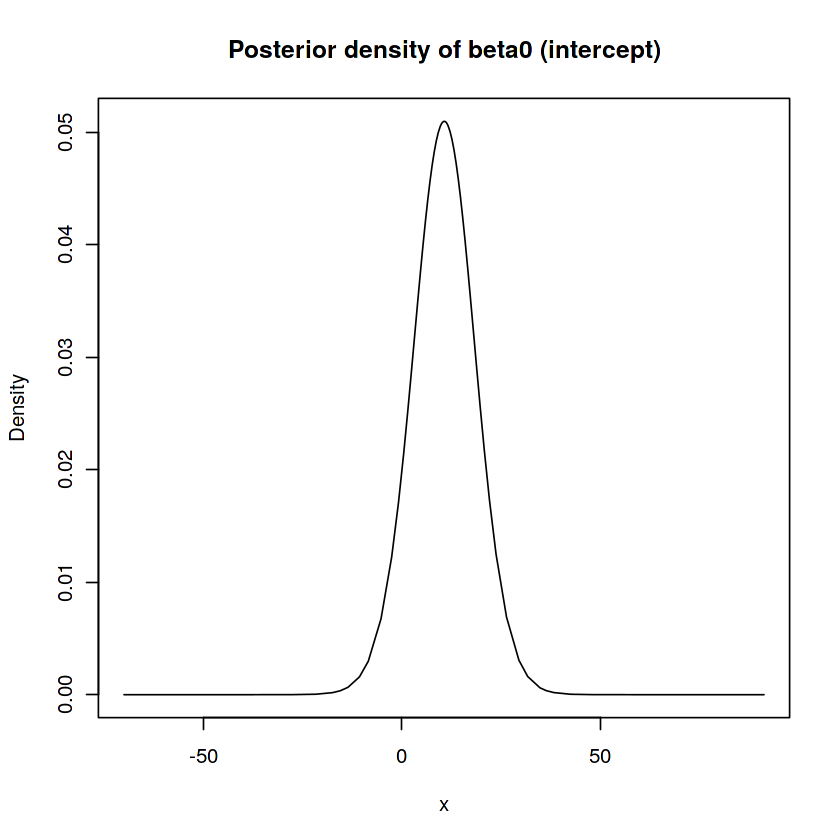

In [8]:
plot(m.mtcars.I$marginals.fixed$'(Intercept)',type='l',xlab="x",ylab="Density",main="Posterior density of beta0 (intercept)")
#This is equivalent to
#plot(m.mtcars.I$marginals.fixed[[1]],type='l',xlab="x",ylab="Density",main="Posterior density of beta0 (intercept)")

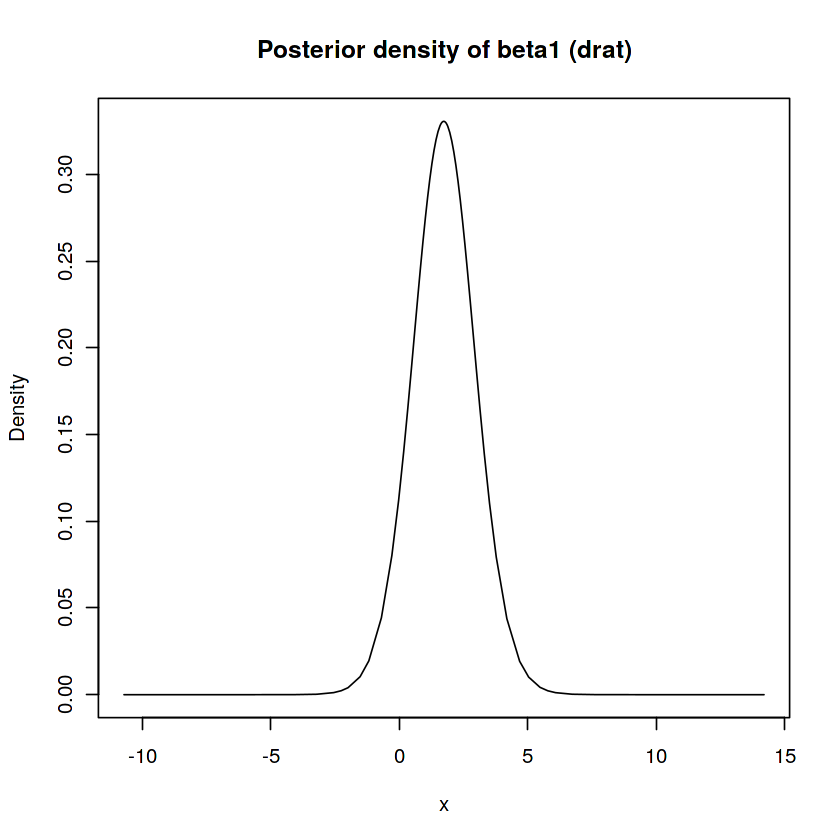

In [9]:
plot(m.mtcars.I$marginals.fixed$'drat',type='l',xlab="x",ylab="Density",main="Posterior density of beta1 (drat)")

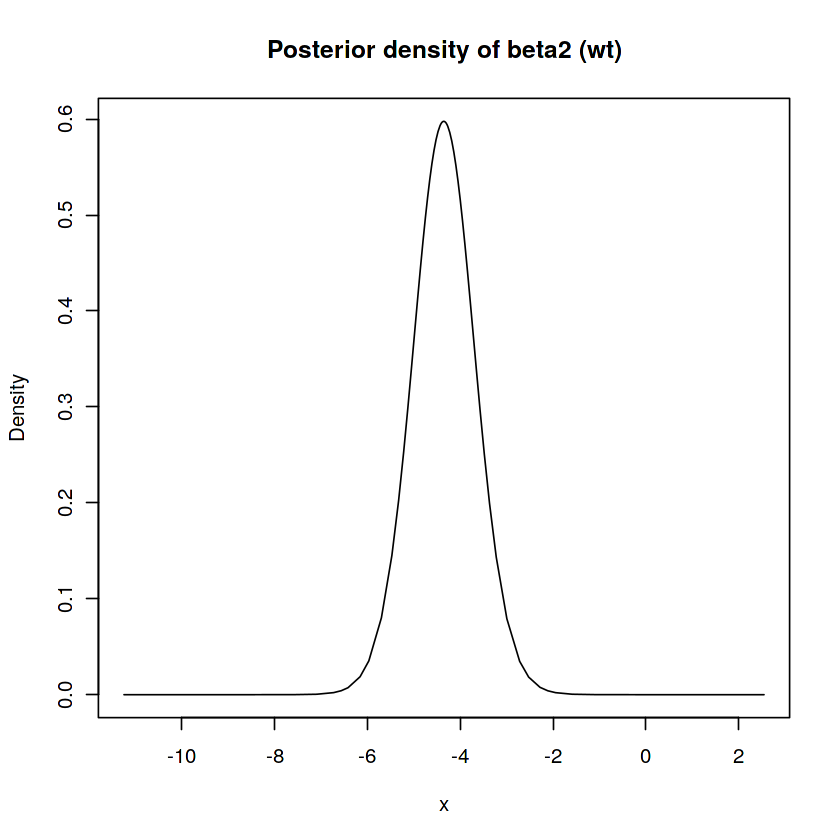

In [10]:
plot(m.mtcars.I$marginals.fixed$'wt',type='l',xlab="x",ylab="Density",main="Posterior density of beta2 (wt)")

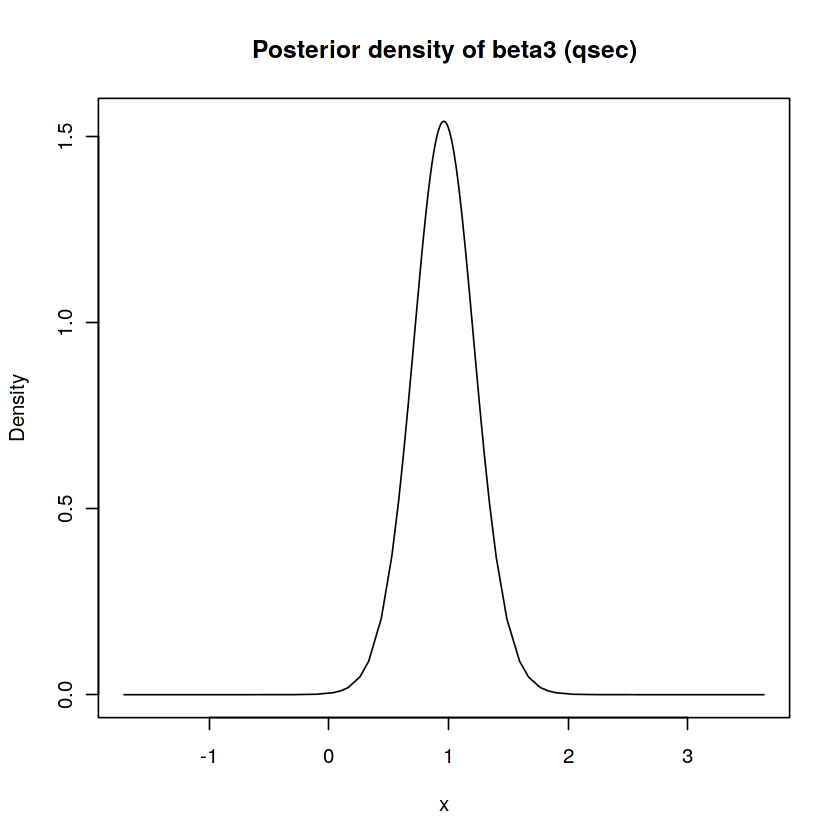

In [11]:
plot(m.mtcars.I$marginals.fixed$'qsec',type='l',xlab="x",ylab="Density",main="Posterior density of beta3 (qsec)")

In [12]:
#We list the names of the hyperparameters for referring to the marginals later
names(m.mtcars.I$marginals.hyperpar)

[1] "Precision for the Gaussian observations"

In [13]:
marginal.tau=m.mtcars.I$marginals.hyperpar$`Precision for the Gaussian observations`
#We could also obtain the same marginal by
#marginal.tau=m.mtcars.I$marginals.hyperpar[[1]]
marginal.sigma2 <- inla.tmarginal(function(tau) tau^(-1),marginal.tau)
cat("Summary statistics of sigma2\n")
inla.zmarginal(marginal.sigma2)                             

Summary statistics of sigma2
Mean            6.98973 
Stdev           1.97813 
Quantile  0.025 4.10783 
Quantile  0.25  5.58175 
Quantile  0.5   6.65381 
Quantile  0.75  8.01757 
Quantile  0.975 11.8051 


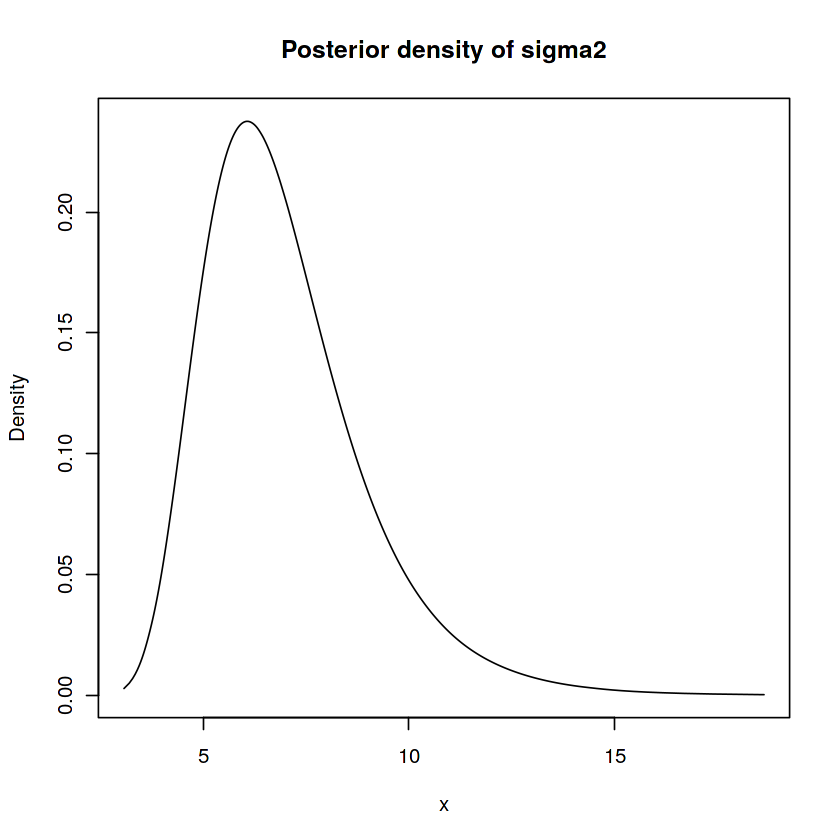

In [14]:
plot(marginal.sigma2,type='l',xlab="x",ylab="Density",main="Posterior density of sigma2")

If we compare this with the JAGS results from Lecture 2, we can see that they are virtually identical, with the INLA plots looking more accurate.

Now we will show how to obtain samples from the posterior, jointly in all of the parameters (not only from the marginals).

In [15]:
#For sampling from the joint posterior of the parameters, we need to include 
#control.compute = list(config = TRUE) when calling INLA

#By default, this will also produce samples from posterior
#predictive distributions
#both for the rows in the data with existing response variables 
#(the so-called replicate distribution), or a new set of rows without response.
#The reponse variable in the data has to be set to NA
#for the new set of covariates for which
#we want to compute the posterior predictive

m.mtcars.I.post=inla(mpg~drat+wt+qsec,data=mtcars1,family="gaussian",
                control.family=list(hyper=prec.prior),control.fixed=prior.beta,
               control.compute = list(config = TRUE))

nsamp=10000;
mtcars.samples=inla.posterior.sample(n=nsamp, result=m.mtcars.I.post)

#By default, the output will include all of the hyperparameters and the latent variables,
#including the variables from the posterior predictive

#We can limit the set of variables included amongst the latent variables
#by adding the argument
#selection = list(`(Intercept)'=1,drat=1) in the call
#mtcars.samples=inla.posterior.sample(nsamp, m.mtcars.I.post, selection = list('(Intercept)'=1,drat=1))
#In this case, only two of the regression coefficients for drat and `(Intercept)' will be included

#mtcars.samples=inla.posterior.sample(nsamp, m.mtcars.I.post, selection = list(Predictor=1:10))
#In this case, only the first 10 predictor variables will be included, corresponding to the posterior
#predictive for the first 10 rows in the dataset


In [16]:
#The samples can be accessed by mtcars.samples[[i]], 
#where i is the number of the sample from 1 to nsamp
#We can see the structure of a single sample by printing out
mtcars.samples[[1]]

#We can access the latent variables by
#mtcars.samples[[1]]$latent[1], mtcars.samples[[1]]$latent[2], ..., mtcars.samples[[1]]$latent[36]
#We can access the precision hyperparameter by mtcars.samples[[1]]$hyperpar

,sample1
Predictor:1,21.3009188
Predictor:2,20.7159985
Predictor:3,24.9215931
Predictor:4,21.1719073
Predictor:5,17.6235865
Predictor:6,20.6561770
Predictor:7,15.8216057
Predictor:8,22.2611038
Predictor:9,25.6462758
Predictor:10,19.4572641


In [ ]:
#Now we are going to plot the posterior distribution
#for the intercept using these samples

#The fastest way to collect all samples from a given variable is using the 
#inla.posterior.sample.eval function, which extracts these into a matrix 
#this can be converted to a vector by as.vector if needed

intercept.samples=inla.posterior.sample.eval(function(...) {(Intercept)},
   mtcars.samples)
drat.samples=inla.posterior.sample.eval(function(...) {drat},
   mtcars.samples)

#The most accurate way to sample from the hyperparameters is
#not using inla.posterior.sample,
#but by using inla.hyperpar.sample instead

precision.samples=inla.hyperpar.sample(n=nsamp, result=m.mtcars.I.post)
sigma2.samples=1/precision.samples

plot(density(intercept.samples))
plot(density(drat.samples))
plot(density(sigma2.samples))

Warning message in inla.posterior.sample.eval(function(...) {:
“Function 'inla.posterior.sample.eval()' is experimental.”


These plots look very similar to what we have obtained previously by plotting the marginals computed by INLA.

In [18]:
#Here we add a new row of covariates, but with response set as NA
#INLA will compute the posterior predictive for this

#We create a new dataframe from the new covariates

mtcars_new=data.frame(mpg=NA, drat= 5.14,wt=3.252,qsec=10.6)
row.names(mtcars_new)<-'Ferrari 488 GTB Coupe'

#We can add this as a new row in the mtcars1 dataframe by rbind
mtcars2=rbind(mtcars1,mtcars_new)

#We set control.compute = list(config = TRUE) so that the calculations for posterior sampling are done
#We set control.predictor = list(compute = TRUE) so that the marginals of
#the posterior predictive are computed, and accessible in 
#m.mtcars.I.post2$marginals.fitted.values

m.mtcars.I.post2=inla(mpg~drat+wt+qsec,data=mtcars2,family="gaussian",
                control.family=list(hyper=prec.prior),control.fixed=prior.beta,
               control.compute = list(config = TRUE), control.predictor = list(compute = TRUE))


nsamp=10000

#We set selection = list(Predictor=33)
#to only save the values of the linear predictor eta_i for the new datapoint,
#which is the 33rd row in the dataset

mtcars.samples2=inla.posterior.sample(n=nsamp, result=m.mtcars.I.post2, selection = list(Predictor=33))


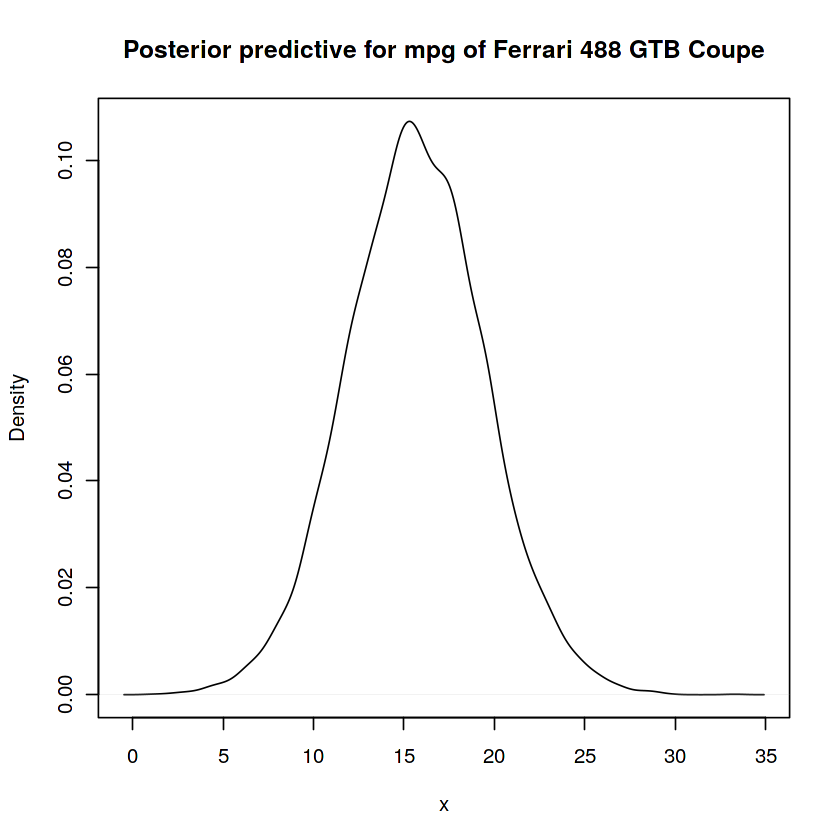

In [19]:
#First, we collect the samples from the linear predictor
predictor.samples=inla.posterior.sample.eval(function(...) {Predictor},
mtcars.samples2)

#Then, we collect the samples from paramater sigma, using the samples from the precision theta
sigma.samples=1/sqrt(inla.posterior.sample.eval(function(...) {theta},
mtcars.samples2))

#We create the samples from the posterior predictive by adding the Gaussian noise to the predictor samples

post.pred.samples=predictor.samples+rnorm(n=nsamp,mean=0,sd=sigma.samples)

plot(density(post.pred.samples),xlab="x",ylab="Density",main="Posterior predictive for mpg of Ferrari 488 GTB Coupe")



[1] 15.64869

[1] 15.6723

[1] 2.727263

[1] 3.801558

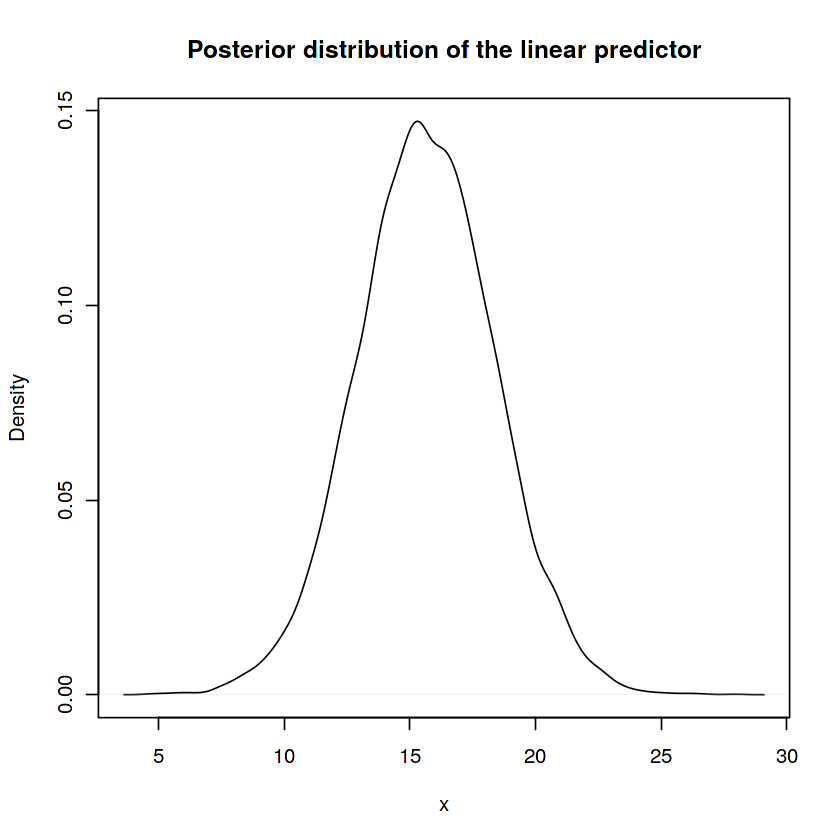

In [20]:
#The posterior density of the samples from the linear predictor is different,
#the standard devation is smaller, as it does not contain the added observation noise

plot(density(predictor.samples),type='l',xlab="x",ylab="Density",main="Posterior distribution of the linear predictor")

#The means are the same
mean(predictor.samples)
mean(post.pred.samples)



#But he standard deviations are different
sd(predictor.samples)
sd(post.pred.samples)


# Posterior predictive checks for mtcars dataset

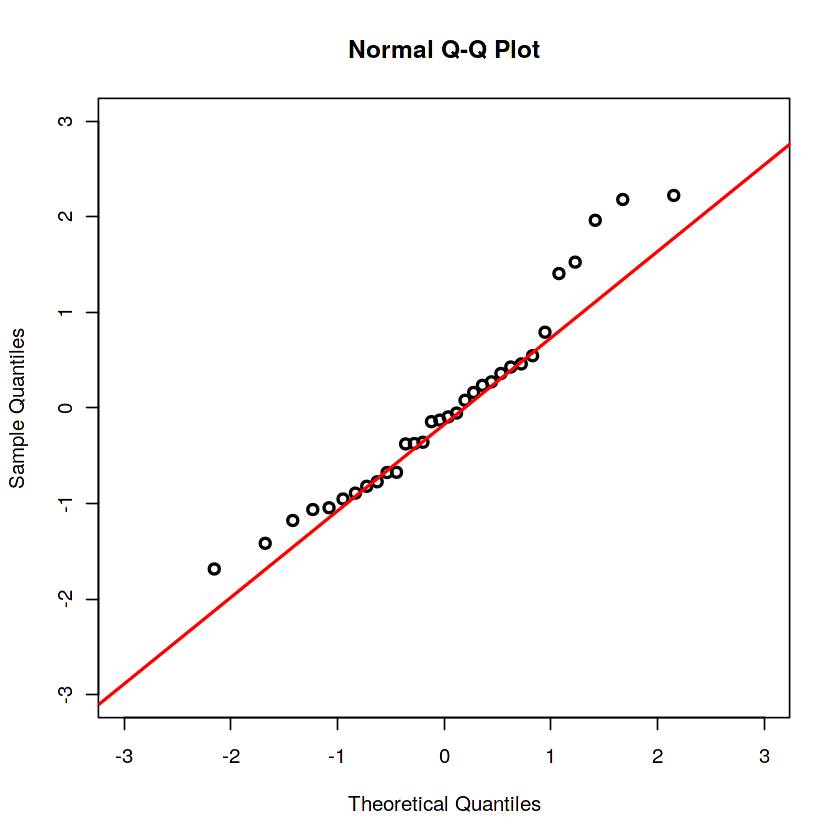

In [21]:
### next section is about checks based on studentised residuals
#We obtain the posterior samples from the original dataset, without the added row 

prec.prior <- list(prec=list(prior = "loggamma", param = c(0.1, 0.1)))
prior.beta <- list(mean.intercept = 0, prec.intercept = 0.001,
                    mean = 0, prec = 0.001)
m.mtcars.I.post=inla(mpg~drat+wt+qsec,data=mtcars1,family="gaussian",
                control.family=list(hyper=prec.prior),control.fixed=prior.beta,
               control.compute = list(config = TRUE),
               control.predictor = list(compute = TRUE))
nsamp=10000
mtcars.samples=inla.posterior.sample(n=nsamp, result=m.mtcars.I.post)

#We extract the samples for the 4 regression coefficients
beta0=inla.posterior.sample.eval(function(...) {(Intercept)},
  mtcars.samples)
beta1=inla.posterior.sample.eval(function(...) {drat},
  mtcars.samples)
beta2=inla.posterior.sample.eval(function(...) {wt},
  mtcars.samples)
beta3=inla.posterior.sample.eval(function(...) {qsec},
  mtcars.samples)

#The precision hyperparameter is called theta, so we can get sigma2=1/theta
sigma2=1/(inla.posterior.sample.eval(function(...) {theta},
  mtcars.samples))


n=nrow(mtcars1)
x=cbind(rep(1,n),mtcars1$drat,mtcars1$wt,mtcars1$qsec)
H=x%*%solve((t(x)%*%x))%*%t(x)
y=mtcars1$mpg

#fitted values
fittedvalues=matrix(0,nrow=n,ncol=nsamp)
for(l in 1:nsamp){
fittedvalues[,l]=beta0[l]*x[,1]+beta1[l]*x[,2]+beta2[l]*x[,3]+beta3[l]*x[,4]
}

#Alternatively, we could have obtained the fitted values directly from the samples of the linear predictor
#without working with the regression coefficients and covariates
#In this model the link function is the identity, so fitted values are the same as the linear predictors 
#(E(y_i)=mu_i=eta_i)

#fittedvalues=inla.posterior.sample.eval(function(...) {Predictor},
#mtcars.samples)





#studentised residuals
#n denotes the number of data points in the dataset (i.e. number of cars)
#niterf denotes the number of MCMC samples we are using
studentisedred=matrix(0,nrow=n,ncol=nsamp)
for(l in 1:nsamp){
for(i in 1:n){
studentisedred[i,l]=(y[i]-fittedvalues[i,l])/(sqrt(sigma2[l]*(1-diag(H)[i]))) 
}  
}  

#posterior mean of studentised residuals
studentisedredm=numeric(n)
for(i in 1:n){
studentisedredm[i]=mean(studentisedred[i,])  
}

#QQ-plot
qqnorm(studentisedredm,xlim=c(-3,3),ylim=c(-3,3),lwd=2)
qqline(studentisedredm,col=2,lwd=2)

This is very similar to what we got with JAGS. Now we will check the independence of error terms.

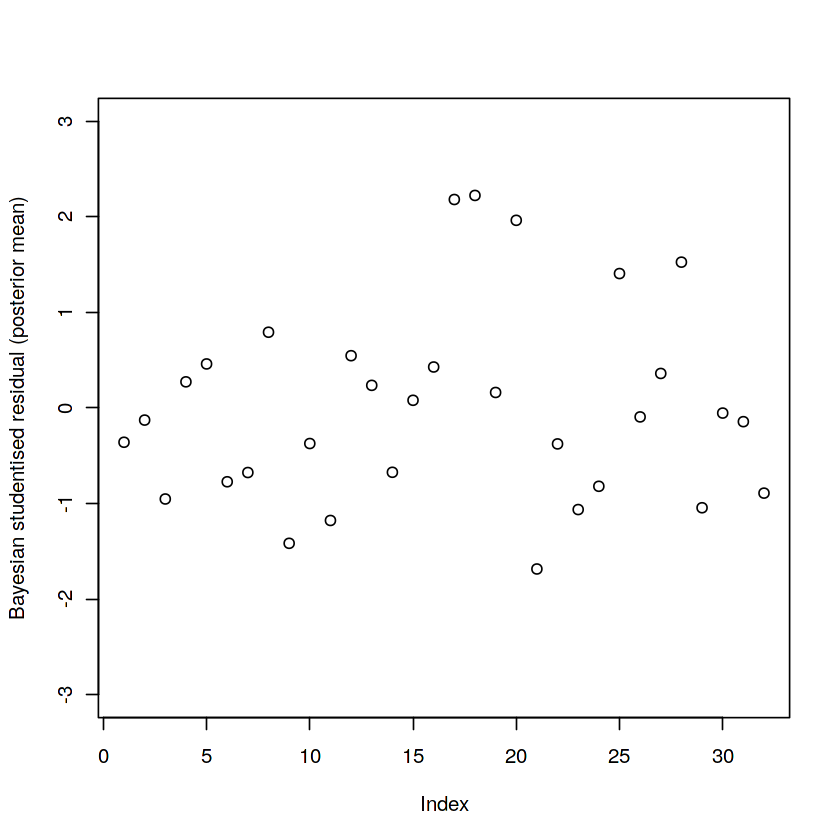

In [22]:
#checking independence of error terms
#seq_along(studentisedredm) creates a vector with the indices of studentisedredm, i.e. 1,2,...,32
#we could also write 1:n instead of seq_along(studentisedredm)
plot(seq_along(studentisedredm),studentisedredm,xlab="Index",ylab="Bayesian studentised residual (posterior mean)",ylim=c(-3,3))

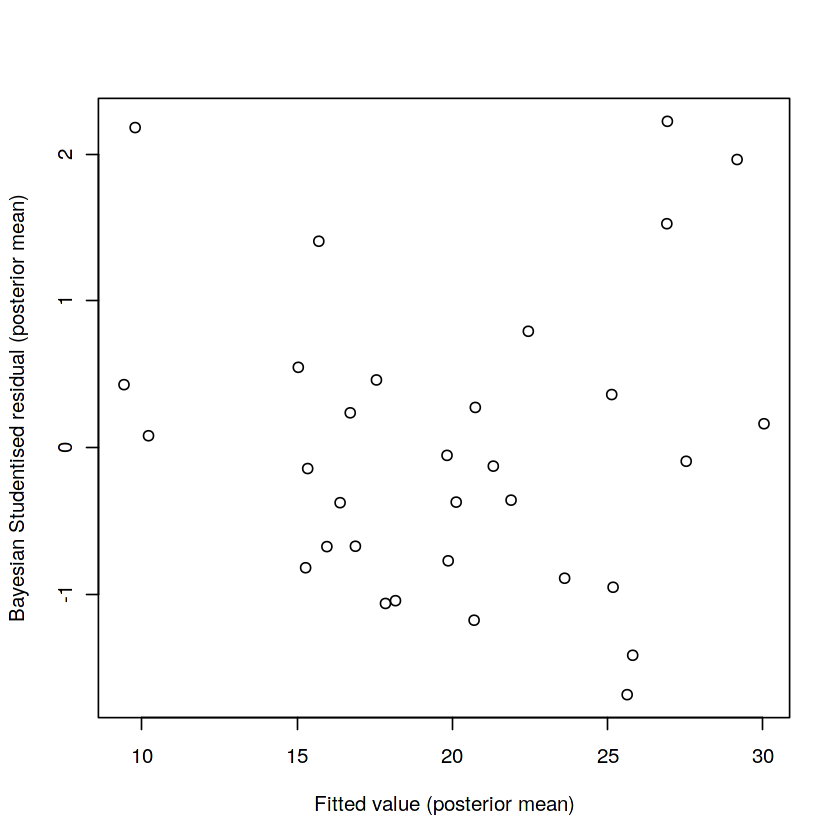

In [23]:
#posterior mean fitted values
fittedvaluesm=numeric(n)
for(i in 1:n){
fittedvaluesm[i]=mean(fittedvalues[i,])  
}

#The means can be also computed without sampling, as they are calculated by INLA,
#fittedvaluesm=m.mtcars.I.post$summary.fitted.values$mean

plot(fittedvaluesm,studentisedredm,xlab="Fitted value (posterior mean)",ylab="Bayesian Studentised residual (posterior mean)")


Now we are going to do some posterior predictive checks using replicates. These replicates are automatically included in the samples obtained by inla.posterior.sample.

In [24]:
prec.prior <- list(prec=list(prior = "loggamma", param = c(0.1, 0.1)))
prior.beta <- list(mean.intercept = 0, prec.intercept = 0.001,
                    mean = 0, prec = 0.001)


m.mtcars.I.post=inla(mpg~drat+wt+qsec,data=mtcars1,family="gaussian",
                control.family=list(hyper=prec.prior),control.fixed=prior.beta,
               control.compute = list(config = TRUE),
               control.predictor = list(compute = TRUE))
nsamp=10000
n=nrow(mtcars1)

mtcars.samples=inla.posterior.sample(n=nsamp, result=m.mtcars.I.post)

#predictive checks
#replicated data

yrep=matrix(0,nrow=n,ncol=nsamp)
y=mtcars1$mpg

#The linear predictors eta_i are included in the samples that we got from inla,
#in the Predictor variables
#The following line collects all of them for each row in the dataset and each iteration
#in a single matrix

predictor.samples=inla.posterior.sample.eval(function(...) {Predictor},
   mtcars.samples)

#We need to collect the samples from parameter sigma,
#this is done by extracting the precision samples (denoted by theta), and then
#computing them by sigma=theta^(-1/2)

sigma.samples=1/sqrt(inla.posterior.sample.eval(function(...) {theta},
   mtcars.samples))

yrep=matrix(0,nrow=n,ncol=nsamp)

for(row.num in 1:n){
    yrep[row.num, ]<-
    predictor.samples[row.num, ]+rnorm(n=nsamp,mean=0,sd=sigma.samples)
}



#statistics of interest in this case (and different from the ones included in the model)
yrepmin=apply(yrep,2,min)
yrepmax=apply(yrep,2,max)
yrepmedian=apply(yrep,2,median)

require(fBasics)
yrepskewness=apply(yrep,2,skewness)
yrepkurtosis=apply(yrep,2,kurtosis)

Loading required package: fBasics

Loading required package: timeDate

Loading required package: timeSeries



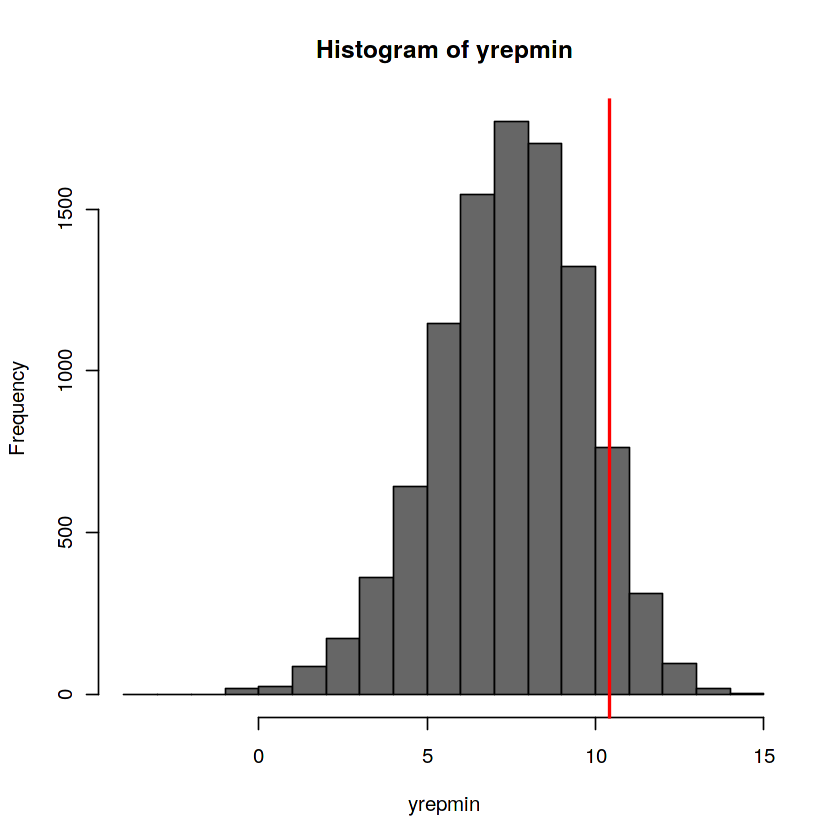

In [25]:
#Predictive checks using replicated data - minimum
hist(yrepmin,col="gray40")
abline(v=min(y),col="red",lwd=2)

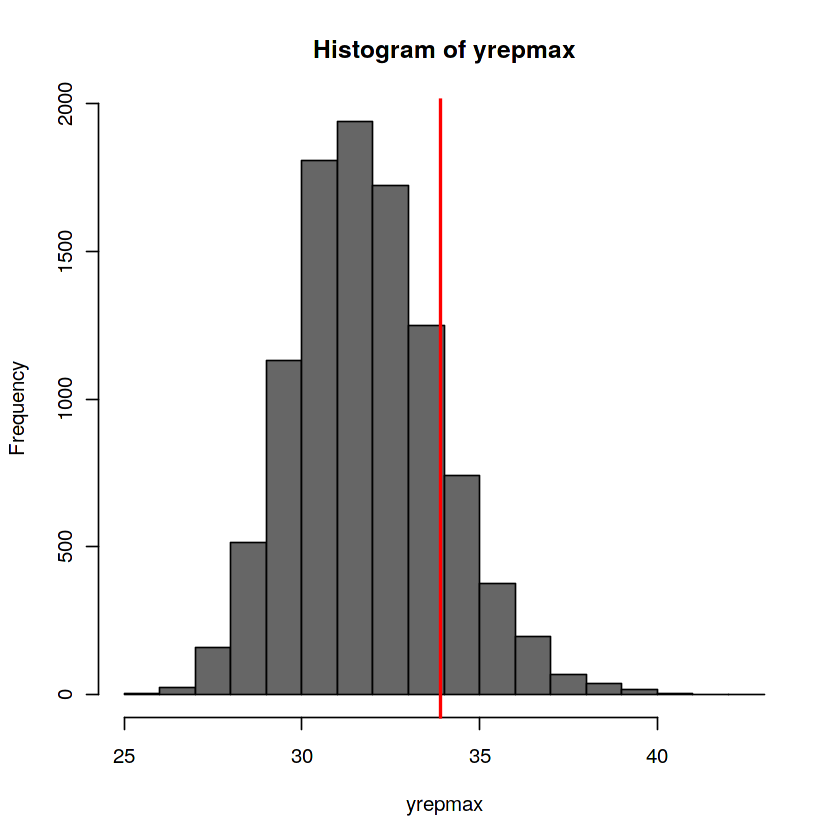

In [26]:
#Predictive checks using replicated data - maximum
hist(yrepmax,col="gray40")
abline(v=max(y),col="red",lwd=2)

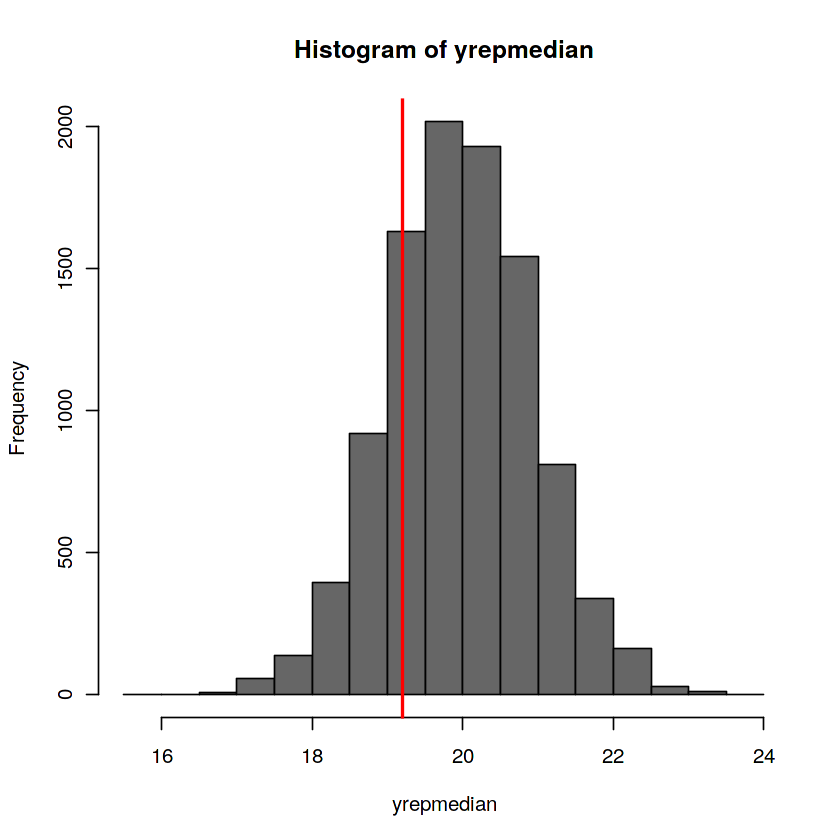

In [27]:
#Predictive checks using replicated data - median
hist(yrepmedian,col="gray40")
abline(v=median(y),col="red",lwd=2)

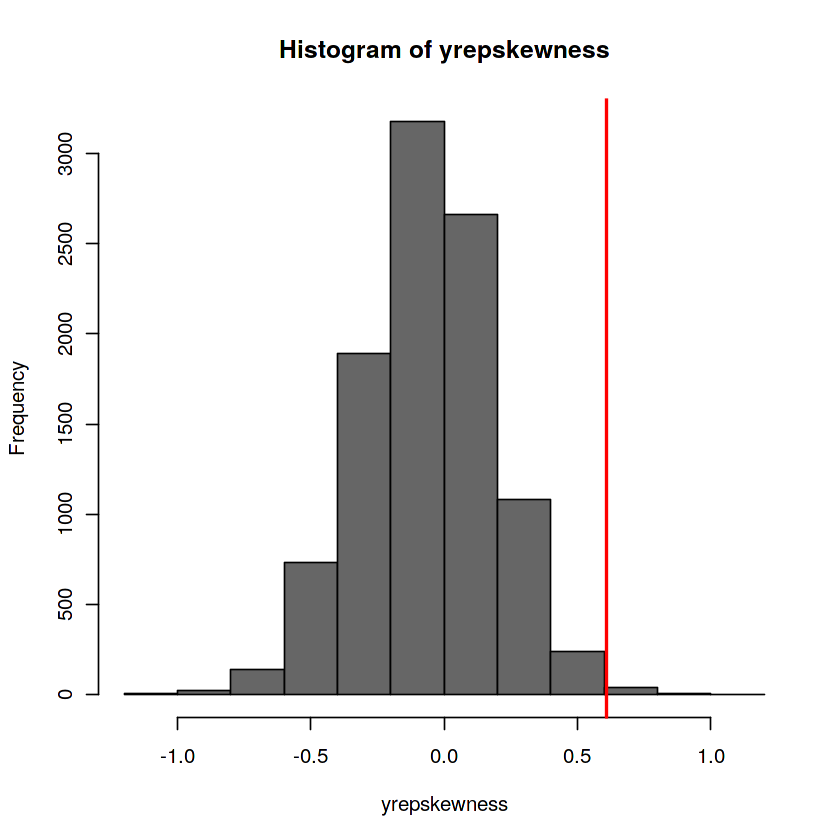

In [28]:
#Predictive checks using replicated data - skewness
hist(yrepskewness,col="gray40")
abline(v=skewness(y),col="red",lwd=2)

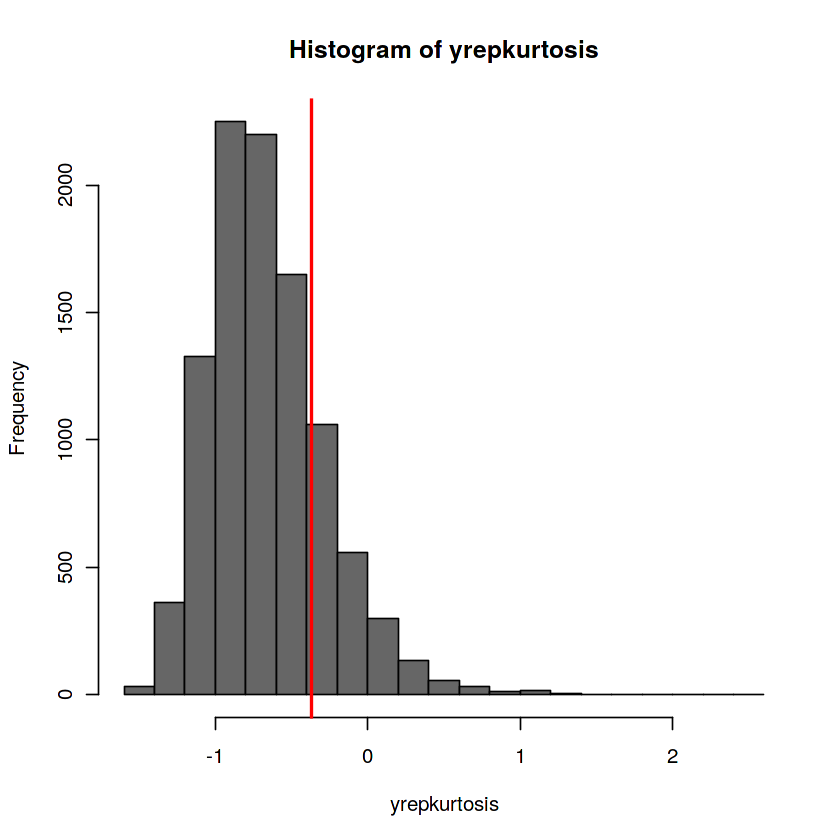

In [29]:
#Predictive checks using replicated data - kurtosis
hist(yrepkurtosis,col="gray40")
abline(v=kurtosis(y),col="red",lwd=2)

These results are all very similar to what we got from JAGS.

# 2. Scottish hill racing data - Robust linear regression

In [30]:
#Robust linear regression - Hills example
#The following code downloads hills.txt from a Google docs file.
#You can also add it manually by clicking on File / Add or upload data (from Learn)
system("wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=14E8BXmznTLrkSGCb9xrqe2fo1fXe6Enb' -O /kaggle/working/hills.txt")

#We read the data into a dataframe using read.table
hills=read.table("hills.txt",header=TRUE)
#The response variable is the time, the covariates are the climb of the race, and the distance

#n denotes the number of races
n=nrow(hills)
head(hills)

,race,dist,climb,time
,<fct>,<dbl>,<int>,<dbl>
1,Greenmantle,2.5,650,16.083
2,Carnethy,6.0,2500,48.350
3,Craig Dunain,6.0,900,33.650
4,Ben Rha,7.5,800,45.600
5,Ben Lomond,8.0,3070,62.267
6,Goatfell,8.0,2866,73.217


In [31]:
#Setting the priors for Student's t distribution, as before
#precision has Gamma prior with paramaters a=b=0.1, as in Lecture 2
#Because INLA's internal parametrization is logarithmic for the precision,
#this is denoted by  prec=list(prior = "loggamma", param = c(0.1, 0.1))
#Degrees of freedom (dof) is fixed at 5
#Due to the fact that dof is stored as log(dof-2) internally, this corresponds to initial=log(5-2).
#dof = list(initial=log(5-2), fixed=TRUE)
#fixed=TRUE tells INLA that this is fixed, and will stay the same during the simulation
#by default, there is a prior on it (so called Penalized Complexity dof prior with parameters 15, 0.5)

#You can view the default priors and internal storage for the
# hyperparameters of Student's t likelihood by entering
#inla.models()$likelihood$t
#Similarly, you could type inla.models()$likelihood$gaussian to see this info for the Gaussian likelihood

prior.t <- list(prec=list(prior = "loggamma", param = c(0.1, 0.1)), dof = list(initial=log(5-2), fixed=TRUE) ) 

#We choose mean 0 and variance 1000 priors for all of the regression coefficients (fixed effects)
#This corresponds to precision = 0.001

prior.fixed <- list(mean.intercept = 0, prec.intercept = 0.001,
                    mean = 0, prec = 0.001)

m.hills.I <- inla(time ~ 1+climb+dist,family="T",data=hills,control.family=list(hyper=prior.t),control.fixed=prior.fixed)
summary(m.hills.I)


Call:
   c("inla(formula = time ~ 1 + climb + dist, family = \"T\", data = 
   hills, ", " control.family = list(hyper = prior.t), control.fixed = 
   prior.fixed)" ) 
Time used:
    Pre = 0.364, Running = 0.0981, Post = 0.0308, Total = 0.493 
Fixed effects:
              mean    sd 0.025quant 0.5quant 0.975quant   mode kld
(Intercept) -9.525 2.276    -14.285   -9.438     -5.270 -9.276   0
climb        0.008 0.001      0.006    0.008      0.011  0.008   0
dist         6.582 0.266      6.028    6.590      7.087  6.608   0

Model hyperparameters:
                                          mean    sd 0.025quant 0.5quant
precision for the student-t observations 0.016 0.006      0.007    0.015
                                         0.975quant  mode
precision for the student-t observations       0.03 0.013

Expected number of effective parameters(stdev): 3.00(0.002)
Number of equivalent replicates : 11.69 

Marginal log-Likelihood:  -149.73 

> The results are essentially identical to what we got from JAGS in Lecture 2.

Now we are going to evaluate some model checking criteria (CPO, DIC, marginal likelihood, and PIT for this model). We need to rerun the model with the additional parameter 
control.compute=list(cpo=TRUE, dic=TRUE, PIT=TRUE)

DIC: 264.55 
NSLCPO: 133.6297 
Log marginal likelihood: -149.7289 


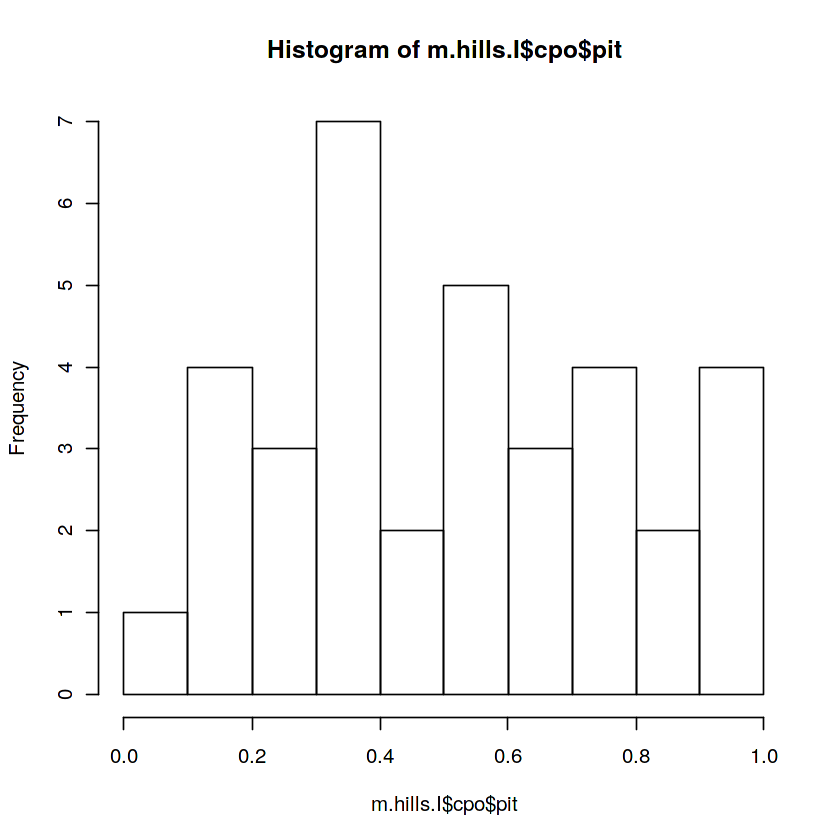

In [32]:
m.hills.I <- inla(time ~ 1+climb+dist,family="T",data=hills,
                  control.family=list(hyper=prior.t),
                  control.fixed=prior.fixed, 
                  control.compute=list(cpo=TRUE, dic=TRUE))
cat("DIC:",m.hills.I$dic$dic,"\n")
cat("NSLCPO:",-sum(log(m.hills.I$cpo$cpo)),"\n")
cat("Log marginal likelihood:",m.hills.I$mlik[1],"\n")
#We display a histogram of the PIT values
hist(m.hills.I$cpo$pit)

In [33]:
As a comparison, we also fit a standard linear regression model
with Gaussian noise.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: As a
       ^


As a comparison, we also fit a standard linear regression model
with Gaussian noise.

In [ ]:
prec.prior <- list(prec=list(prior = "loggamma", param = c(0.1, 0.1)))
prior.fixed <- list(mean.intercept = 0, prec.intercept = 0.001,
                    mean = 0, prec = 0.001)

m.hills.I.gaussian <- inla(time ~ 1+climb+dist,family="gaussian",
                           data=hills,control.family=list(hyper=prec.prior),
                           control.fixed=prior.fixed,
                           control.compute=list(cpo=TRUE, dic=TRUE))
cat("DIC:",m.hills.I.gaussian$dic$dic,"\n")
cat("NSLCPO:",-sum(log(m.hills.I.gaussian$cpo$cpo)),"\n")
cat("Log marginal likelihood:",m.hills.I.gaussian$mlik[1],"\n")
#We display a histogram of the PIT values
hist(m.hills.I.gaussian$cpo$pit)

As we can see, the robust regression model is a better fit to this data according to all 4 criteria.

# 3. Ship accidents data - Poisson regression

In [ ]:
system("wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=1A0EAkG0VJktgqmuNl3uBIj0RevE0_gDo' -O /kaggle/working/Ships.csv")

ShipsIncidents <- read.csv("/kaggle/working/Ships.csv",sep=",")
head(ShipsIncidents)
summary(ShipsIncidents)
ShipsIncidentsr=ShipsIncidents
ShipsIncidentsr$y=NA
ShipsIncidentsr=rbind(ShipsIncidents,ShipsIncidentsr)

In [ ]:
head(ShipsIncidents)
nrow(ShipsIncidents)

In [ ]:
formula.inla <- y ~ 1 + type + built + oper

m.ships.poisson.I <- inla(formula.inla,family="poisson", data=ShipsIncidents, E=months)

#The rate in the Poisson distribution for the total number of accidents
#for each ship is proportional to the number of months the ship spends in the sea
#This is different for each ship, and it is contained in the months variable
#We can take this into account in the Poisson model by setting E=months

#As in the Poisson likelihood model the linear predictor is linked to the rate by the
#log function, we could identically write this as
#m.ships.poisson.I <- inla(formula.inla,family="poisson", data=ShipsIncidents, offset=log(months))


summary(m.ships.poisson.I)

# 4. Lidar data - smoothing

In [ ]:
#loads the lidar dataset from the SemiPar package
install.packages("SemiPar")
library("SemiPar")
data(lidar)
#plots the lidar data
plot(lidar,main="Lidar data logratio vs range")

In [ ]:

m.lidar.poly <- inla(logratio ~ 1 + range +  I(range^2) + I(range^3),
  data = lidar, control.predictor = list(compute = TRUE))
#We include control.predictor = list(compute = TRUE) to tell INLA to compute the
#posterior summaries for the fitted values
summary(m.lidar.poly)

In [ ]:
plot(lidar,main="Lidar logratio vs range, smoothing with polynomial of degree 3")
lines(lidar$range,m.lidar.poly$summary.fitted.values$mean,type='l')
lines(lidar$range,m.lidar.poly$summary.fitted.values$'0.025quant',lty=2,col='red')
lines(lidar$range,m.lidar.poly$summary.fitted.values$'0.975quant',lty=2,col='red')

In [ ]:
m.lidar.rw1 <- inla(logratio ~ 0 + f(range, model = "rw1", constr = FALSE),
  data = lidar,control.predictor = list(compute = TRUE))
#The constr=FALSE parameter means that there are no constraints on the random effects
#We remove the intercept to avoid model identifiability issues
summary(m.lidar.rw1)

In [ ]:
plot(lidar,main="Lidar logratio vs range, smoothing with RW1 random effects")
lines(lidar$range,m.lidar.rw1$summary.fitted.values$mean,type='l')
lines(lidar$range,m.lidar.rw1$summary.fitted.values$'0.025quant',lty=2,col='red')
lines(lidar$range,m.lidar.rw1$summary.fitted.values$'0.975quant',lty=2,col='red')

In [ ]:
m.lidar.rw2 <- inla(logratio ~ 0 + f(range, model = "rw2", constr = FALSE),
  data = lidar, control.predictor = list(compute = TRUE))
summary(m.lidar.rw2)

In [ ]:
plot(lidar,main="Lidar logratio vs range, smoothing with RW2 random effects")
lines(lidar$range,m.lidar.rw2$summary.fitted.values$mean,type='l')
lines(lidar$range,m.lidar.rw2$summary.fitted.values$'0.025quant',lty=2,col='red')
lines(lidar$range,m.lidar.rw2$summary.fitted.values$'0.975quant',lty=2,col='red')